# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.


<a></a><font size="4"><b>Задача</b></font><br/>

Требуется провести анализ доступных факторов и выявить их влияние на стоимость недвижимости. Рассматриваемые факторы: принадлежность к конкретной области региона, удалённость от центра, категория этажности, высота потолков, удалённость от парков и аэропортов и пр.

- Провести подготовку данных к анализу
- Определить дополнительные параметры:
    - цену квадратного метра
    - день недели, месяц и год публикации
    - категорию этажности
    - удаленность от центра города
- Провести исследовательский графический анализ факторов, влияющих на конечную стоимость недвижимости

<a></a><font size="4"><b>План работы:</b></font><br/> 


**Шаг 1. Обзор данных**
- откроем и изучим файл
- определим и изучим пропущенные значения и типы данных

**Шаг 2. Проведем предобработку данных**
- заполним пропуски, где это возможно, объясним, почему именно так заполняем пропуски
- приведем данные к нужным типам (с пояснением выбора типа)
- удалим редкие и аномальные значения, опишем, какие особенности обнаружили
- проверим данные на явные и неявные дубликаты, в случае обнаружения, удалим их

**Шаг 3. Добавим в таблицу вспомогательные столбцы для анализа**
- цена одного квадратного метра
- день публикации объявления
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры
- расстояние в км до центра города

**Шаг 4. Проведем исследовательский анализ данных**
1. Изучаем следующие параметры:
    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - цена объекта;
    - количество комнат;
    - высота потолков;
    - этаж квартиры;
    - тип этажа квартиры («первый», «последний», «другой»);
    - общее количество этажей в доме;
    - расстояние до центра города в метрах;
    - расстояние до ближайшего аэропорта;
    - расстояние до ближайшего парка;
    - день и месяц публикации объявления.

    Построим отдельные гистограммы для каждого из этих параметров и опишем наши наблюдения.


2. Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. \
Опишим, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго. 


3. Изучим какие факторы больше всего влияют на стоимость квартиры. \
    Изучим, зависит ли цена от:
    - общей площади;
    - жилой площади;
    - площади кухни;
    - количества комнат;
    - этажа, на котором расположена квартира (первый, последний, другой);
    - даты размещения (день недели, месяц, год).
    
   Построим графики, которые покажут зависимость цены от указанных выше параметров. \
   Для подготовки данных перед визуализацией используем сводные таблицы.


4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.


5. Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишим, как стоимость объектов зависит от расстояния до центра города.
**Шаг 5. Напишем общий вывод**


### Обзор данных.

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
# чтение файла с данными и сохранение в data
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
# получение первых 10 строк таблицы data
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# получение общей информации о данных в таблице data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
#наименование колонок
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
# выявление аномалий в данных
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [7]:
#найдем дату первого и последнего размещения объявления
display(data['first_day_exposition'].min())
display(data['first_day_exposition'].max())

#посмотрим есть ли дубликаты в датафрейме
print('Количество дубликатов:', data.duplicated().sum())

'2014-11-27T00:00:00'

'2019-05-03T00:00:00'

Количество дубликатов: 0


In [8]:
#расмотрим уникальные значения в столбце с названиями населенных пунктов
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Нужно будет удалить неявные дубликаты, например, «Мурино» и «поселок Мурино», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. 

**Описание данных**
- `airports_nearest` —  расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

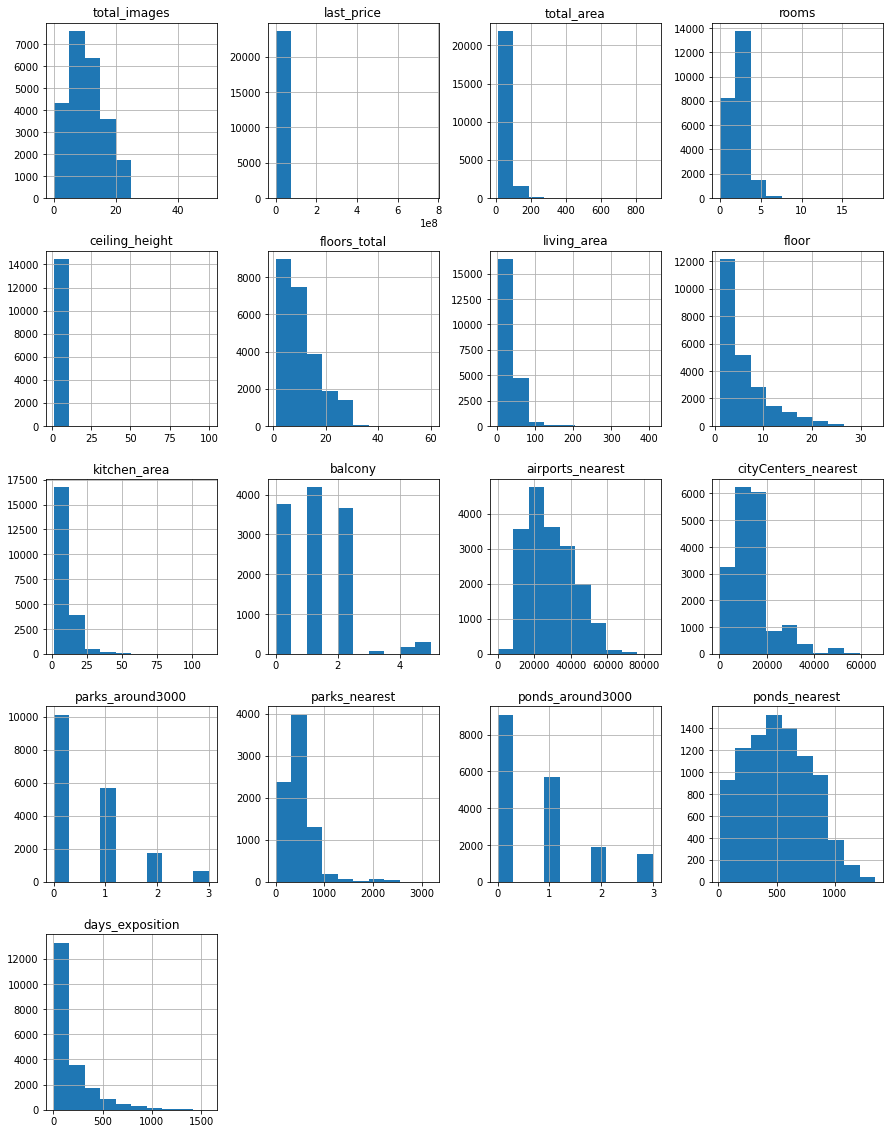

In [9]:
#построим общую гистограмму для всех столбцов таблицы
data.hist(figsize=(15, 20));

**Вывод:** 
- В таблице 22 столбца и 23699 строк. Типы данных — `bool`(2), `float`(14), `int`(3), `object`(3)
- Есть пропущенные значения в 14 столбцах: `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`
- Данные данны за период c `27.11.2014` по `03.05.2019`
- Тип данных в `first_day_exposition` поменять на `datetime`
- Тип данных в `is_apartment` поменять на `bool`
- Тип данных в `balcony` поменять на `int` и пропущенные значения заменить на `0`
- Тип данных в `airports_nearest`, `cityCenters_nearest`, `days_exposition`, `last_price`, ` parks_around3000`, `ponds_around3000` поменять на `int`, 
- Тип данных в `floors_total` поменять на `int` и пропущенные значения заменить на `floor`
- Есть редкие и выбивающиеся значения в `ceiling_height`, `floors_total`, `last_price`, `living_area`, `total_area`
- Есть неявные дубликаты в названиях населенных пунктах `locality_name`



### Предобработка данных

#### Удаление пропусков и изменение типов данных

In [10]:
#Проверим датафрейм на пустые значения
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [11]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Процент пропущенных значений' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

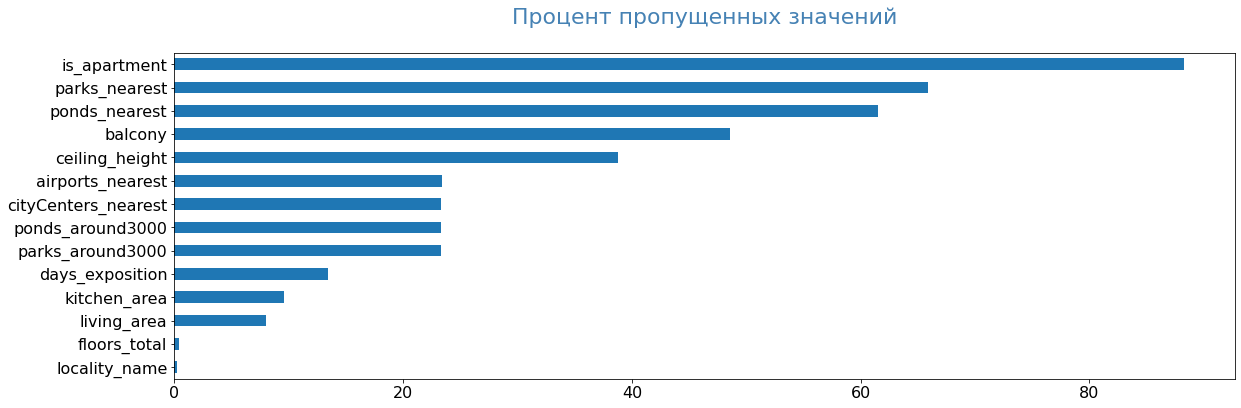

In [12]:
pass_value_barh(data)

Есть пропущенные значения в 14 столбцах: 
- `ceiling_height` —  продавец мог не знать или ему было лень заполнять высоту потолков, заполним пропущенные значения медианой. Предположу, что в Питере высота потолков, зависит от удаленности от центра города. Поэтому категоризируем все строки по удаленности от центра и возьмем медиану по высоте потолков, чтобы заполнить пропуски.
- `floors_total` —  продавец не указал сколько всего этажей в доме, такие пропуски можно заменить на этаж на котором находится квартира
- `living_area`, `kitchen_area`  —  продавец не указал площадь т.к. она ему неизвестна или не может быть определена, например, потому что это студия, свободная планировка, количнство комнат равно 0 для этих вариантов заполним площадь `0`.  Для остальных пропущенных значений, проставлять среднее или медиану было бы некорректно, заполним `-1`
- `is_apartment` —  продавец не указал, что квартира аппартаменты, логично изменить пропуски на False
- `balcony` —  продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. 
- `locality_name` —  доля пропущенных значений составляет ~0,2%, заполним эти значения `г.Санкт-Петербург`, если растояния до центра города меньше минимального растояния до границы города (меньше 10км), для остальных значений заполним `-1`
- `airports_nearest`, `parks_nearest`, `ponds_nearest`, `cityCenters_nearest`— пропуски в расстоянии говорят либо о том, что рядом парка или водоема нету, либо о том, что парк (водоем) находится очень далеко и расстояние не учитывается в приложении. Ещё вариант, что продавец не заполнил адрес/населенный пункт в объявлении, могла произойти ошибка при выгрузке данных. Здесь также можно заполнить значения одинаковым числом, неким маркером, например `-1`, чтобы по нему потом можно было удобно фильтроваться 
- `parks_around3000`, `ponds_around3000`  —  парки и пруды не самые важные параметры квартиры, в целом они даже не влияют на дальнейший анализ, заполним также `-1`

- `days_exposition` —  скорее всего, данные пропущенны, потому что объявления ещё не снято с публикации на момент выгрузки данных, заполним колличеством дней прошедших со дня публикации до 03.05.2019


In [13]:
#заполним пропущенные значения 'locality_name' на Санкт-Петербург, 
#если растояния до центра города меньше минимального растояния до границы города (меньше 10км)
data.loc[(data['cityCenters_nearest'] > 0) & 
         (data['cityCenters_nearest'] < 10000) & 
         (data['locality_name'].isna()), 'locality_name'] = 'Санкт-Петербург'

#посчитаем сколько пропущенных значений осталось в 'locality_name'
print('Количество пропущенных значений в locality_name:', data['locality_name'].isna().sum())

Количество пропущенных значений в locality_name: 24


остались пропущенные значения в `locality_name` в 24 строках, это менее чем 0,1% данных, удалим эти строки

In [14]:
data =  data.dropna(subset=['locality_name'])

Категоризируем все строки по удаленности от центра и возьмем медиану по высоте потолков, чтоб заполнить пропуски.

Выделим категории:

- 0-2.5км от центра (категория `самый центр`)
- 2.5-5км от центра (категория `центр`)
- 5-10км от центра (категория `в пределах города`)
- 10-17км от центра (категория `пригород`)
- более 17км от центра (категория `область`)

Напишем под это функцию:

In [15]:
def cityCenters_category(row):
    try:
        if (row['cityCenters_nearest'] < 2500) and (row['cityCenters_nearest'] > 0):
            return '1) самый центр СПб'
        elif row['cityCenters_nearest'] < 5000:
            return '2) центр СПб'
        elif row['cityCenters_nearest'] < 10000:
            return '3) в пределах города'
        elif row['cityCenters_nearest'] < 17000 or (row['locality_name'] == 'Санкт-Петербург'):
            return '4) спальные районы и пригород'
        elif (row['cityCenters_nearest'] >= 17000) or (row['locality_name'] != 'Санкт-Петербург'):
            return '5) область'
    except:
        pass
    
#создадим и добавим в новый столбец соответствующую категорию
data['center_category'] = data.apply(cityCenters_category, axis=1)

#посмотрим результат
data[['locality_name', 'cityCenters_nearest', 'center_category']].head()

,locality_name,cityCenters_nearest,center_category
0,Санкт-Петербург,16028.0,4) спальные районы и пригород
1,посёлок Шушары,18603.0,5) область
2,Санкт-Петербург,13933.0,4) спальные районы и пригород
3,Санкт-Петербург,6800.0,3) в пределах города
4,Санкт-Петербург,8098.0,3) в пределах города


Заполним пропуски в столбце `ceiling_height` медианой по каждой группе `center_category` 

In [16]:
data.groupby('center_category')['ceiling_height'].median().sort_values(ascending=False)

center_category
1) самый центр СПб               3.20
2) центр СПб                     3.08
3) в пределах города             2.80
4) спальные районы и пригород    2.60
5) область                       2.60
Name: ceiling_height, dtype: float64

In [17]:
data['center_category'].unique()

array(['4) спальные районы и пригород', '5) область',
       '3) в пределах города', '1) самый центр СПб', '2) центр СПб'],
      dtype=object)

In [18]:
for i in data['center_category'].unique():
    data.loc[(data['center_category'] == i) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['center_category'] == i), 'ceiling_height'].median()

#проверка
data['ceiling_height'].isna().sum()

0

In [19]:
#пропущенные значениям в колонке 'floors_total' присвоем соответствующие значения из столбца 'floor'
data['floors_total'] = data['floors_total'].fillna(value=data['floor'])

In [20]:
#проверка на корректность заполнения пропусков
if data[data['floors_total'] < data['floor']].shape[0] == 0:
    print('Пропуски в floors_total заполненны корректо.')
else:
    print('Пропуски в floors_total заполненны НЕ корректо.')


Пропуски в floors_total заполненны корректо.


In [21]:
#найдем уникальные значения в столбце 'is_apartment'
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [22]:
#методом fillna() заменим пропуск на `False`
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['is_apartment'].value_counts()

False    23625
True        50
Name: is_apartment, dtype: int64

In [23]:
#пропущенные значениям в колонке 'balcony' заменим на `0`
data['balcony'] = data['balcony'].fillna(value=0)

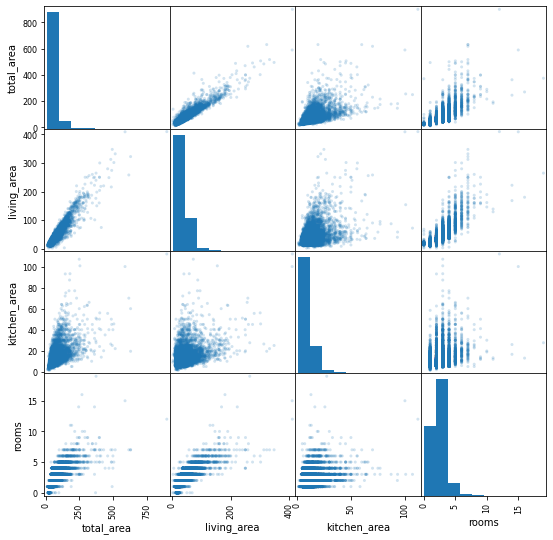

In [24]:
#посмотрим зависимость жилой площади и площади кухни от общей площади
pd.plotting.scatter_matrix(data[['total_area', 'living_area', 'kitchen_area', 'rooms']], figsize=(9, 9), alpha=0.2);

In [25]:
#матрица корреляции
data[['total_area', 'living_area', 'kitchen_area',  'rooms']].corr()

,total_area,living_area,kitchen_area,rooms
total_area,1.000000,0.939553,0.608978,0.758649
living_area,0.939553,1.000000,0.428899,0.845958
kitchen_area,0.608978,0.428899,1.000000,0.270505
rooms,0.758649,0.845958,0.270505,1.000000


Чем больше площадь квартиры, тем больше жилая площадь, корреляция положительная, с количестовм комнат и площадью кухни корреляция меньше

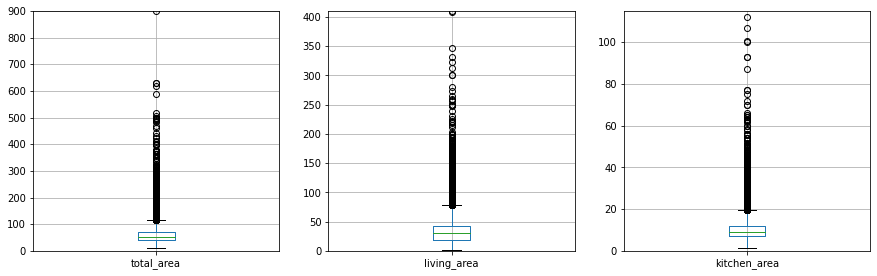

In [26]:
#построим диаграммы размаха для площади 
column_list = ['total_area', 'living_area', 'kitchen_area']
ax = data[column_list].plot(kind='box', 
                            subplots=True, 
                            layout=(3,3), 
                            figsize=(15,15), 
                            grid=True)
ylims = [900, 410, 115]

for i in range(len(column_list)):
    ax[column_list[i]].set_ylim(0, ylims[i])

Не очень наглядно. Видно, что есть выбросы до 900 кв.м, изменим масштаб чтобы лучше разглядеть "ящики с усами"

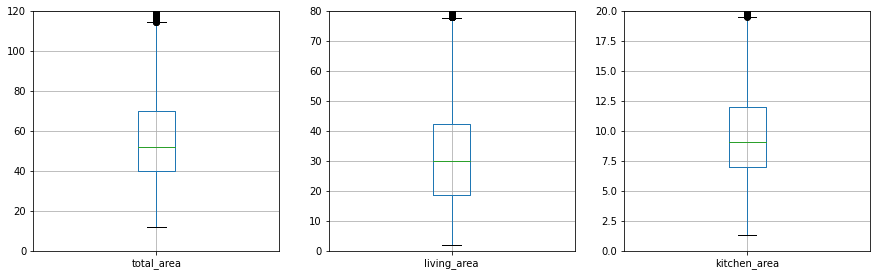

In [27]:
column_list = ['total_area', 'living_area', 'kitchen_area']
ax = data[column_list].plot(kind='box', 
                            subplots=True, 
                            layout=(3,3), 
                            figsize=(15,15), 
                            grid=True)
ylims = [120, 80, 20]

for i in range(len(column_list)):
    ax[column_list[i]].set_ylim(0, ylims[i])

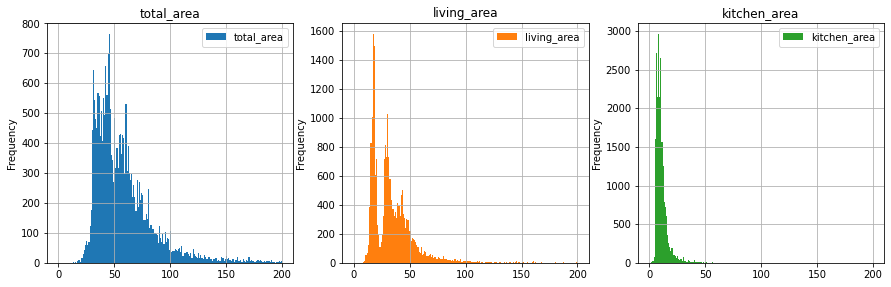

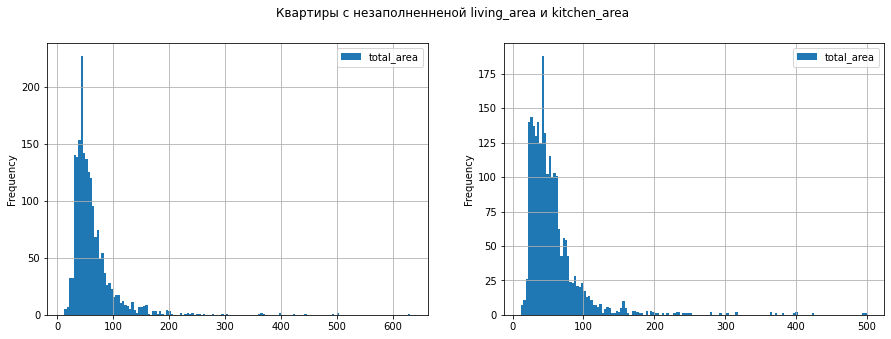

In [28]:
#построим гистрограммы распределения по площади 
column_list = ['total_area', 'living_area', 'kitchen_area']
ax = data[column_list].plot(kind='hist', 
                            bins=200, 
                            range=(0, 200), 
                            subplots=True, 
                            layout=(3,3), 
                            figsize=(15,15), 
                            grid=True, 
                            title=column_list)


fig, axes = plt.subplots(1, 2, figsize=(15,5))
column_list = ['living_area', 'kitchen_area']
data[data['living_area'].isna()].plot(y='total_area', 
                                    kind='hist', 
                                    bins=150, 
                                    grid=True, 
                                    subplots=True,
                                    ax=axes[0])
data[data['kitchen_area'].isna()].plot(y='total_area', 
                                       kind='hist', 
                                       bins=150, 
                                       grid=True, 
                                       subplots=True,
                                       ax=axes[1],
                                       title='Квартиры c незаполненненой living_area и kitchen_area');


Достоверного способа заполнить пропуски нет в living_area и kitchen_area.
Примем такое распределение:
- для квартир-студий площадь кухни назначим 0
- для остальных квартир площадь кухни, а также жилую площадь посчитаем как долю от общей площади. Величину доли посчитаем медианную для квартир входящих в одну категроию по общей площади.
- проверим корректность ввода жилой и площади кухни от общей площади. Примем такое правило: total_area*0.9 <= (living_area + kitchen_area), если объект не соответсвуют этому провилу, то удалим его
- В поле rooms количество комнат встречаются нули. Это нормально - такие квартиры или имеют свободную планировку, или студии. Но при этом оказывается, что некоторые пользователи называют студии однокомнатными. Это не совсем правильно, приведем этот параметр к однообразию - всем студиям назначим количество комнат 0.

На основании графиков категоризируем все строки по общей площади

Выделим  категорий:
- 'менее 20 кв.м'
- '20-30 кв.м' 
- '30-40 кв.м'
- '40-50 кв.м' 
- '50-60 кв.м' 
- '60-70 кв.м' 
- '70-80 кв.м' 
- '80-100 кв.м'
- '100-120 кв.м'
- '120-140 кв.м'
- '140-160 кв.м'
- '160-180 кв.м'
- '180-200 кв.м'
- 'более 200 кв.м'

Напишем под это функцию:

In [29]:
def total_area_category(row):
    try:
        if (row['total_area'] < 20) and (row['total_area'] > 0):
            return '01) менее 20 кв.м'
        elif row['total_area'] < 30:
            return '02) 20-30 кв.м'
        elif row['total_area'] < 40:
            return '03) 30-40 кв.м'
        elif row['total_area'] < 50:
            return '04) 40-50 кв.м'
        elif row['total_area'] < 60:
            return '05) 50-60 кв.м'
        elif row['total_area'] < 70:
            return '06) 60-70 кв.м'
        elif row['total_area'] < 80:
            return '07) 70-80 кв.м'
        elif row['total_area'] < 100:
            return '08) 80-100 кв.м'
        elif row['total_area'] < 120:
            return '09) 100-120 кв.м'
        elif row['total_area'] < 140:
            return '10) 120-140 кв.м'   
        elif row['total_area'] < 160:
            return '11) 140-160 кв.м'        
        elif row['total_area'] < 180:
            return '12) 160-180 кв.м'        
        elif row['total_area'] < 200:
            return '13) 180-200 кв.м'
        elif row['total_area'] >= 200:
            return '14) более 200 кв.м'
    except:
        pass
    
#создадим и добавим в новый столбец соответствующую категорию
data['area_category'] = data.apply(total_area_category, axis=1)

#посмотрим результат
data[['total_area', 'living_area', 'kitchen_area', 'area_category']].sample(5)

,total_area,living_area,kitchen_area,area_category
704,141.0,107.0,20.0,11) 140-160 кв.м
21840,45.5,28.0,8.0,04) 40-50 кв.м
20268,42.9,27.5,6.0,04) 40-50 кв.м
7887,53.2,30.3,8.5,05) 50-60 кв.м
11683,115.0,63.0,14.2,09) 100-120 кв.м


Прежде чем заполнять пропуски в площадях, проверим все ли объекты заполнены праильно, нет ли ошибок ввода пользователем. Нет ли такого, что сумма жилой площади и площади кухни, больше чем общая площадь, сделаем поправку и умножим 'total_area' на 0.9, т.к. есть коридоры, сан.узлы, балконы

In [30]:
display(
    data[data['total_area']*0.90 <= data['living_area']+data['kitchen_area']]
    [['total_area', 'living_area', 'kitchen_area', 'rooms']]
    .sample(10)
    .sort_values(by='total_area')
)
(
    data[data['total_area']*0.90 <= data['living_area']+data['kitchen_area']]
    [['total_area', 'living_area', 'kitchen_area', 'rooms']]
    ['total_area'].count()
)    

,total_area,living_area,kitchen_area,rooms
11441,36.8,26.0,10.0,1
10739,41.0,25.0,13.0,1
10913,43.3,40.7,12.3,1
4993,46.0,30.0,15.0,1
8611,50.4,37.0,11.0,2
17833,57.0,45.0,7.0,3
13063,63.0,52.0,6.5,3
22134,77.0,40.0,30.0,4
2685,100.0,57.0,36.0,2
2257,116.0,75.0,35.0,4


475

In [31]:
#удалим 475 строк
data = data[~(data['total_area']*0.9 <= data['living_area']+data['kitchen_area'])]

In [32]:
print('Количество квартир с 0 комнат:', len(data.query('rooms == 0')))
print('Количество квартир с 0 комнат, со свободной планировкой, не студий:', 
      len(data.query('rooms == 0 and studio == False and open_plan == True')))
print('Количество студий с 0 комнат:', len(data.query('rooms == 0 and studio == True')))
print('Уникальное количество комнат в студии:', data.query('studio == True')['rooms'].unique()) 

Количество квартир с 0 комнат: 197
Количество квартир с 0 комнат, со свободной планировкой, не студий: 59
Количество студий с 0 комнат: 138
Уникальное количество комнат в студии: [0 1]


In [33]:
# в квартирах-студиях комнат нет - назначаем ноль
data.loc[data['studio'] == True, 'rooms'] = 0 

In [34]:
print('Количество студий с 0 комнат:', len(data.query('rooms == 0 and studio == True')))

Количество студий с 0 комнат: 149


In [35]:
#проверим, действительно ли у студий, недвижимости со свободной планировкой не заполнена площадь кухни
data[(data['studio'] == True) | (data['open_plan'] == True)]['kitchen_area'].unique()

array([nan])

In [36]:
#в строках 'kitchen_area' заполним `0`, если это
#студия, недвижимость со свободной планировкой или общая площадь меньше 25 кв.м
data.loc[((data['studio'] == True) | (data['open_plan'] == True) | (data['total_area'] <= 25)) & 
             (data['kitchen_area'].isna()), 'kitchen_area'] = 0

#Пропуски в строках 'living_area' заполним `0`, если это недвижимость со свободной планировкой 
data.loc[(data['open_plan'] == True) & (data['living_area'].isna()), 'living_area'] = 0

print('Количество пропусков living_area:', data['living_area'].isna().sum())
print('Количество пропусков kitchen_area:', data['kitchen_area'].isna().sum())


Количество пропусков living_area: 1895
Количество пропусков kitchen_area: 1953


In [37]:
# для каиегории площади считаем, какая медианная доля общей площади - жилая
for i in data['area_category'].unique():
    ratio = (data[data['area_category'] == i]['living_area'] / data[data['area_category'] == i]['total_area']).median()
    data['living_area'] = data['living_area'].fillna(value = round(data['total_area'] * ratio, 2))

    # проверим, что не вышло жилой площади больше общей
data[data['living_area'] > data['total_area']]['living_area'].count() 

0

In [38]:
# для каиегории площади считаем, какая медианная доля общей площади - площадь кухни
for i in data['area_category'].unique():
    ratio = (data[data['area_category'] == i]['kitchen_area'] / data[data['area_category'] == i]['total_area']).median()
    data['kitchen_area'] = data['kitchen_area'].fillna(value = round(data['total_area'] * ratio, 2))


In [39]:
for column in ['living_area', 'kitchen_area']:
    
    #проверка, что все пропуски мы запонили
    print(f'Количестов пропусков в колонке {column}:', data[column].isna().sum())

Количестов пропусков в колонке living_area: 0
Количестов пропусков в колонке kitchen_area: 0


Проверим, что при этом суммарная площадь и кухни не больше всей квартиры, и скорректируем жилую площадь, если это не так.

In [40]:
display(
    data[data['total_area']*0.9 <= (data['living_area']+data['kitchen_area'])]
    [['total_area', 'living_area', 'kitchen_area', 'rooms','open_plan', 'studio']]
    .sort_values(by='total_area')
)

,total_area,living_area,kitchen_area,rooms,open_plan,studio
12691,24.20,24.20,0.00,0,True,False
9861,25.00,25.00,0.00,0,True,False
10606,25.27,25.00,0.00,0,True,False
5945,25.30,19.50,3.50,1,False,False
5806,25.80,20.20,3.57,1,False,False
...,...,...,...,...,...,...
18641,123.70,72.13,44.70,2,False,False
11747,136.00,79.30,48.00,4,False,False
16199,189.00,145.00,26.16,6,False,False
22907,228.00,200.00,31.56,4,False,False


In [41]:
#скоректируем жилую площадь
area_check = data['total_area']*0.9 - data['living_area']- data['kitchen_area']
data.loc[area_check <= 0, 'living_area'] = round((data['total_area']*0.8 - data['kitchen_area']), 2)

In [42]:
#проверим еще раз
data[data['total_area']*0.9 <= (data['living_area']+data['kitchen_area'])]['total_area'].count()

0

In [43]:
data[['total_area', 'living_area', 'kitchen_area', 'rooms','open_plan', 'studio']].sort_values(by='total_area')

,total_area,living_area,kitchen_area,rooms,open_plan,studio
19904,12.0,10.00,0.0,1,False,False
17961,13.0,7.58,0.0,1,False,False
19807,13.0,10.00,0.0,1,False,False
19546,13.0,7.58,0.0,1,False,False
19558,13.2,7.70,0.0,1,False,False
...,...,...,...,...,...,...
5358,590.0,409.00,100.0,15,False,False
15651,618.0,258.00,70.0,7,False,False
3117,631.0,367.92,60.0,7,False,False
12859,631.2,322.30,19.5,7,False,False


In [44]:
#в остальных случиях заменим пустые значения на -1 методом fillna(), 
#чтобы потом можно было их срезать для проведения анализа
for column in ['airports_nearest', 'cityCenters_nearest', 'parks_around3000','parks_nearest','ponds_around3000',
               'ponds_nearest', 'days_exposition']:
    data[column] = data[column].fillna(-1)

In [45]:
#поменяем тип данных в `first_day_exposiion` на `datetime`
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [46]:
#переведем значения столбцов в `int` используя метод astype()
for column in ['last_price', 'floors_total', 'balcony', 'airports_nearest',
               'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest','days_exposition']:
    data[column] = data[column].astype(int, errors='ignore')

In [47]:
#итоговая проверка
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_category,area_category
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,Санкт-Петербург,18863,16028,1,482,2,755,-1,4) спальные районы и пригород,09) 100-120 кв.м
1,7,3350000,40.40,2018-12-04,1,2.60,11,18.60,1,False,...,посёлок Шушары,12817,18603,0,-1,0,-1,81,5) область,04) 40-50 кв.м
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.30,4,False,...,Санкт-Петербург,21741,13933,1,90,2,574,558,4) спальные районы и пригород,05) 50-60 кв.м
3,0,64900000,159.00,2015-07-24,3,2.80,14,92.71,9,False,...,Санкт-Петербург,28098,6800,2,84,3,234,424,3) в пределах города,11) 140-160 кв.м
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,Санкт-Петербург,31856,8098,2,112,1,48,121,3) в пределах города,09) 100-120 кв.м
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,False,...,городской посёлок Янино-1,-1,-1,-1,-1,-1,-1,55,5) область,03) 30-40 кв.м
6,6,3700000,37.30,2017-11-02,1,2.60,26,10.60,6,False,...,посёлок Парголово,52996,19143,0,-1,0,-1,155,5) область,03) 30-40 кв.м
7,5,7915000,71.60,2019-04-18,2,2.60,24,41.75,22,False,...,Санкт-Петербург,23982,11634,0,-1,0,-1,-1,4) спальные районы и пригород,07) 70-80 кв.м
8,20,2900000,33.16,2018-05-23,1,2.60,27,15.43,26,False,...,посёлок Мурино,-1,-1,-1,-1,-1,-1,189,5) область,03) 30-40 кв.м
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,Санкт-Петербург,50898,15008,0,-1,0,-1,289,4) спальные районы и пригород,06) 60-70 кв.м


In [48]:
#итоговая проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23200 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23200 non-null  int64         
 1   last_price            23200 non-null  int64         
 2   total_area            23200 non-null  float64       
 3   first_day_exposition  23200 non-null  datetime64[ns]
 4   rooms                 23200 non-null  int64         
 5   ceiling_height        23200 non-null  float64       
 6   floors_total          23200 non-null  int64         
 7   living_area           23200 non-null  float64       
 8   floor                 23200 non-null  int64         
 9   is_apartment          23200 non-null  bool          
 10  studio                23200 non-null  bool          
 11  open_plan             23200 non-null  bool          
 12  kitchen_area          23200 non-null  float64       
 13  balcony         

In [49]:
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
center_category         0
area_category           0
dtype: int64

**Вывод**
- заполнили пропущенные значения в 14 столбцах
- пустые значения в `locality_name` заминили на `Санкт-Петербург` при `cityCenters_nearest` меньше 10 км, остальные строки удалили из датафрейма
- пустые значения в `ceiling_height` заполнили медианой по высоте потолков, для этого категоризировали все строки по удаленности от центра.
- в столбце `floors_total` присвоили соответствующие значения из столбца `floor`
- в столбце `is_apartment` добавили значение `False`
- пустые значения в `balcony` заменили на `0`
- нашли положительную корреляцию у `living_area` и `kitchen_area` с `total_area`
- категоризировали все строки по общей площади - колонка `area_category`
- пустые значения в `living_area`, `kitchen_area` заполнили медианной долей от общей площади по каждой группе `area_category`
- все оставшиеся пустые значения заменили на `-1` , чтобы в будущем анализе было легче провести срез
- перевели столбец `first_day_exposition` в тип данных `datetime`
- перевели значения столбцов в формат `int`, используя метод astype()

#### Обработка аномальных значений

In [50]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23200.000000,2.320000e+04,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000,23200.000000
mean,9.847241,6.513007e+06,60.223825,2.065517,2.721797,10.695216,34.307961,5.901853,10.152525,0.591638,22107.705733,10933.857586,0.235517,166.722026,0.357974,198.618621,156.703276
std,5.677340,1.088983e+07,35.520985,1.078144,0.737282,6.584783,21.999530,4.880023,5.761019,0.958989,16471.274302,9648.841662,0.975565,307.275011,1.109272,305.777125,213.878763
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.000000,3.414500e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,10275.000000,2332.000000,0.000000,-1.000000,0.000000,-1.000000,23.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.000000,0.000000,21875.000000,11298.000000,0.000000,-1.000000,0.000000,-1.000000,74.000000
75%,14.000000,6.750000e+06,69.507500,3.000000,2.760000,16.000000,42.000000,8.000000,11.600000,1.000000,34463.000000,15277.000000,1.000000,302.000000,1.000000,390.000000,199.000000
max,50.000000,7.630000e+08,900.000000,19.000000,32.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Первое что бросилось в глаза при обзоре данных, есть редкие и выбивающиеся значения (аномалии) в столбцах:
- `last_price` — минимальная цена `12 190`, а максимальная `763 000 000`
- `total_area` — минимальная общая площадь `12`, а максимальная `900`
- `rooms` — минимальное количество `0`, а максимальное `19`
- `ceiling_height` — минимальная высота потолка `1`, а максимальная `100`, указана высота потолков 25м и 32м. Логично предположить, что на самом деле это вещественные значения: 2,5 м и 3,2 м. Скорее всего это ошибка ввода
- `floors_total` — максимальное количество этажей 60 (самый высокое жилое здание в СПб 37 этажей)

Построим диграммы размаха для этих столбцов, чтобы визуализировать, какие значения оказались вдали от среднего, и насколько их много

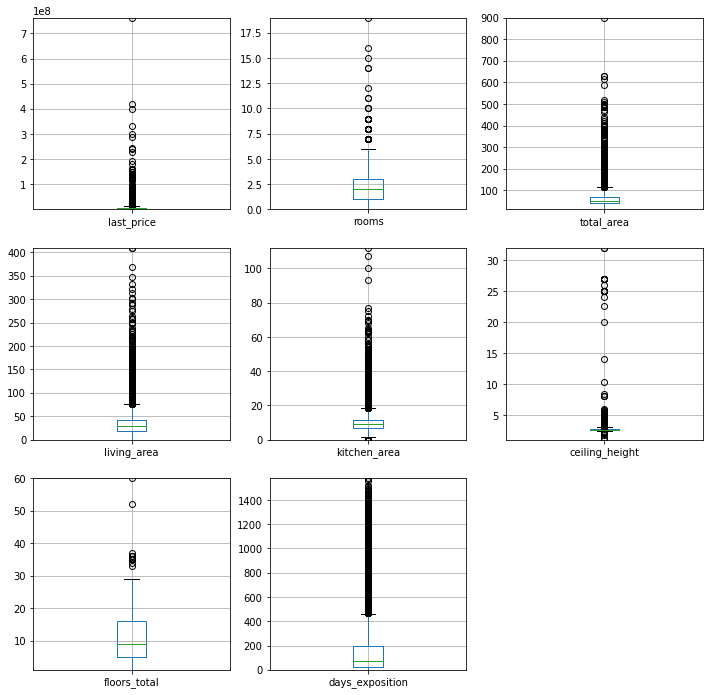

In [51]:
column_list = ['last_price', 'rooms', 'total_area', 'living_area', 'kitchen_area', 
               'ceiling_height','floors_total', 'days_exposition']
ax = data[column_list].plot(kind='box', subplots=True, layout=(3,3), figsize=(12,12), grid=True)


for i in range(len(column_list)):
    ax[column_list[i]].set_ylim(data[column_list[i]].min(), data[column_list[i]].max())

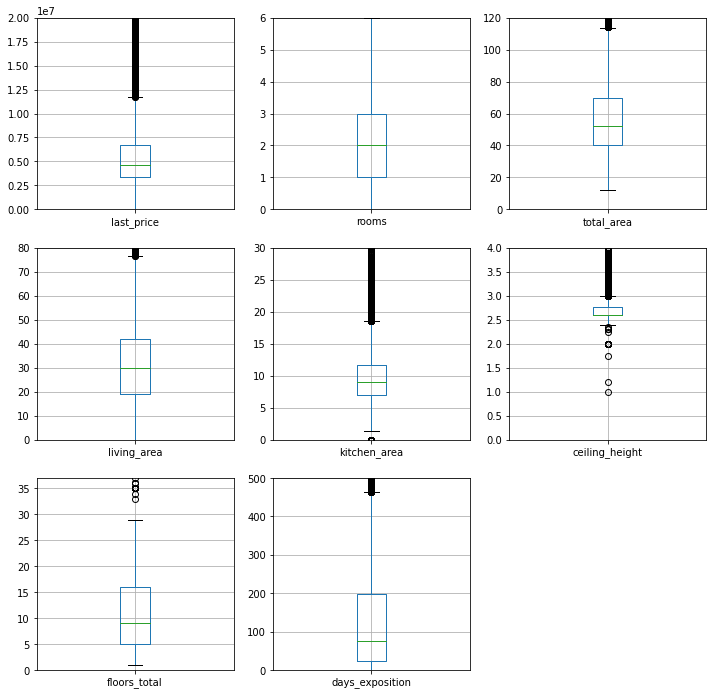

In [52]:
#рассмотрим ящик с усами подробнее
ax = data[column_list].plot(kind='box', subplots=True, layout=(3,3), figsize=(12,12), grid=True)
ylims = [20000000, 6, 120, 80, 30, 4, 37, 500]

for i in range(len(column_list)):
    ax[column_list[i]].set_ylim(0, ylims[i]);

In [53]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,7895
2,7787
3,5664
4,1142
5,316
0,208
6,98
7,59
8,12
9,8


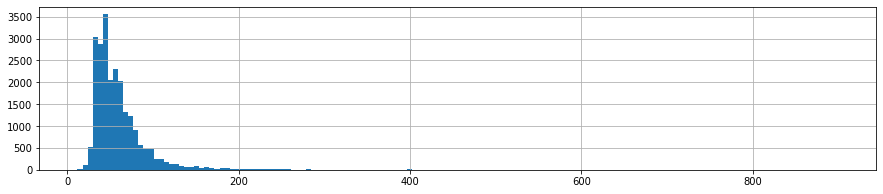

In [54]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

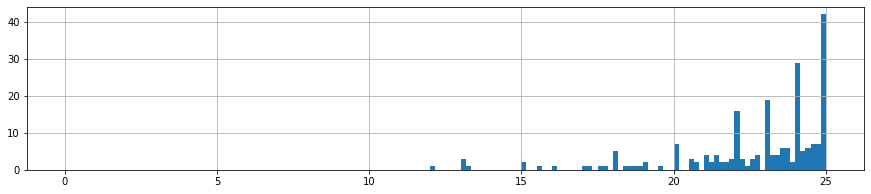

In [55]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (0,25));

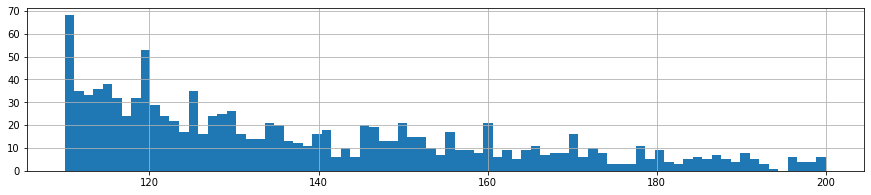

In [56]:
data.total_area.hist(bins = 80, figsize = (15,3), range = (110,200));

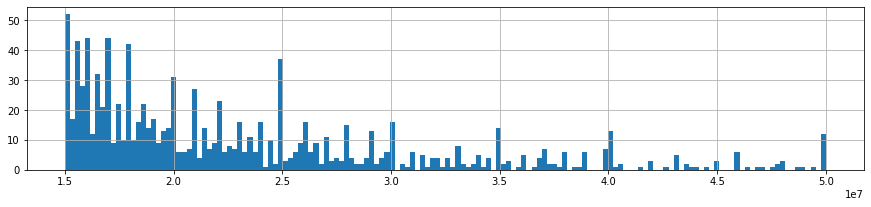

In [57]:
data.last_price.hist(bins = 150, figsize = (15,3), range = (15000000,50000000));

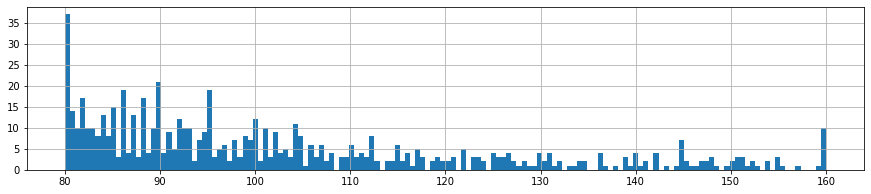

In [58]:
data.living_area.hist(bins = 150, figsize = (15,3), range = (80,160));

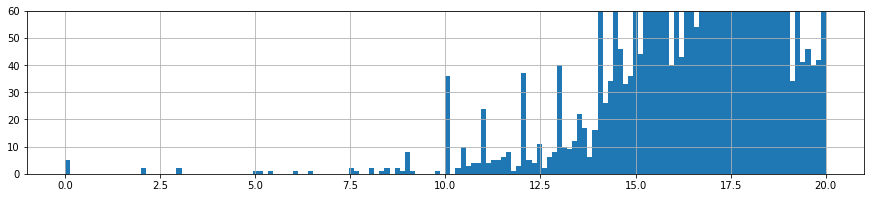

In [59]:
# check
data.living_area.hist(bins = 150, figsize = (15,3), range = (0,20))
plt.ylim(0,60);

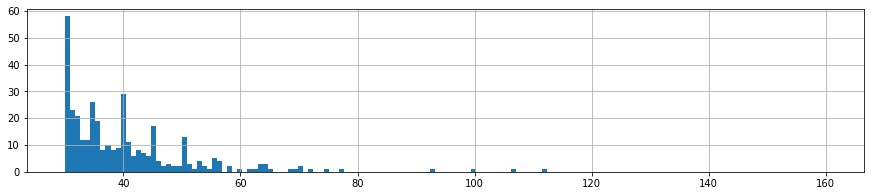

In [60]:
data.kitchen_area.hist(bins = 150, figsize = (15,3), range = (30,160));

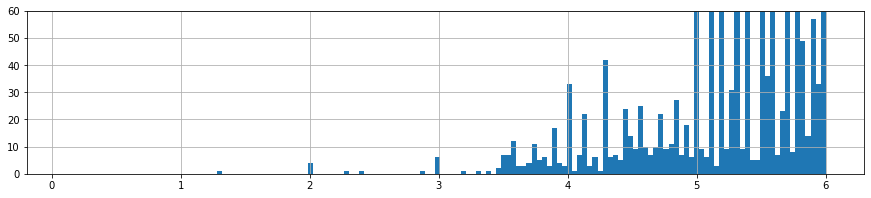

In [61]:
# check
data.kitchen_area.hist(bins = 150, figsize = (15,3), range = (0.1,6))
plt.ylim(0,60);

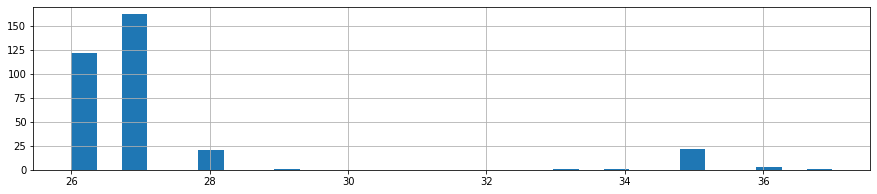

In [62]:
data.floors_total.hist(bins = 30, figsize = (15,3), range = (26,37));

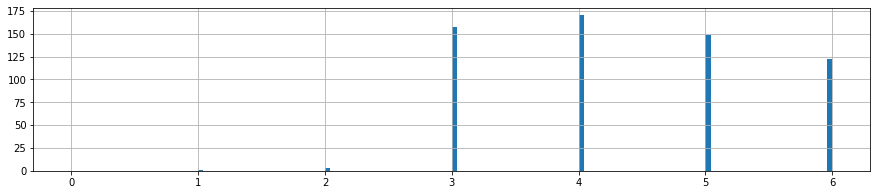

In [63]:
# check
data.days_exposition.hist(bins = 150, figsize = (15,3), range = (0,6));

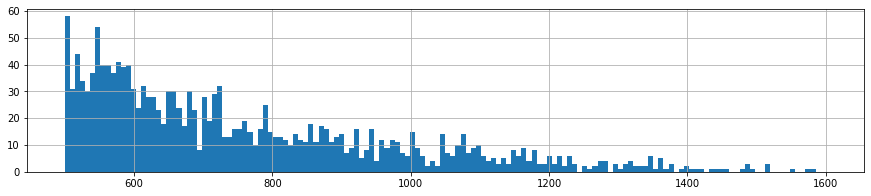

In [64]:
data.days_exposition.hist(bins = 150, figsize = (15,3), range = (500,1600));

Установим границы:
- `last_price` — 0.4-30 млн.р.;
- `rooms` — 0-6 комнат;
- `total_area` — 23-160 кв.м;
- `living_area` — 10-110 кв.м;
- `kitchen_area` — 0, 4-50 кв.м;
- `ceiling_height` — 2,4-4 м
- `floors_total` — 1-28 этажей
- `days_exposition` — (-1), 3-1100 дней

In [65]:
#посчитаем колличество экстримальных выбросов по 'last_price'
print('колличество экстримальных выбросов:')
print('last_price:', data[(data['last_price']<400000) | (data['last_price']>30000000)]['last_price'].count())

#осчитаем колличество экстримальных выбросов по 'rooms'
print('rooms', data[data['rooms']>6]['rooms'].count())

#посчитаем колличество экстримальных выбросов по 'total_area'
print('total_area', data[(data['total_area']<23) | (data['total_area']>160)]['total_area'].count())

#посчитаем колличество экстримальных выбросов по 'living_area'
print('living_area', data[(data['living_area']<10) | 
                          (data['living_area']>110)]['living_area'].count())

#посчитаем колличество экстримальных выбросов по 'kitchen_area'
print('kitchen_area', data[((data['kitchen_area']>0) & 
                           (data['kitchen_area']<4)) | 
                           (data['kitchen_area']>50)]['kitchen_area'].count())

# исправим ошибки ввода в 'ceiling_height' больше 20 поделим на 10
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if x>=20 else x)

#посчитаем колличество экстримальных выбросов по 'ceiling_height'
print('ceiling_height', data[(data['ceiling_height']<2.4) | (data['ceiling_height']>4)]['ceiling_height'].count())

#посчитаем колличество экстримальных выбросов по 'floors_total'
print('floors_total', data[data['floors_total']>28]['floors_total'].count())

#посчитаем колличество экстримальных выбросов по 'days_exposition'
print('days_exposition', data[((data['days_exposition']>0) & (data['days_exposition']<3)) | (data['days_exposition']>1100)]['days_exposition'].count())

колличество экстримальных выбросов:
last_price: 304
rooms 90
total_area 514
living_area 314
kitchen_area 150
ceiling_height 70
floors_total 31
days_exposition 165


In [66]:
#сформируем новый датасет без экстримальных выбросов
data_new = data[(data['last_price']>=400000) & (data['last_price']<=30000000)]
data_new = data_new[data_new['rooms']<=6]
data_new = data_new[(data_new['total_area']>=23) & (data_new['total_area']<=160)]
data_new = data_new[(data_new['living_area']>=10) & (data_new['living_area']<=110)]
data_new = data_new[(data_new['kitchen_area']==0) | ((data_new['kitchen_area']>=4) & (data_new['kitchen_area']<=50))]
data_new = data_new[(data_new['ceiling_height']>=2.4) & (data_new['ceiling_height']<=4)]
data_new = data_new[data_new['floors_total']<=28]
data_new = data_new[(data_new['days_exposition']==-1) | ((data_new['days_exposition']>=3) & (data_new['days_exposition']<=1100))]

print('Количестов строк в исходном датафрейме:',  23699)
print('Количестов строк в новом датафрейме:', data_new.shape[0])
print('Удалено строк:', 23699-data_new.shape[0])
print('Доля отфильтрованных строк:' , round((1 - data_new.shape[0] / 23699)*100, 1), f'%')

Количестов строк в исходном датафрейме: 23699
Количестов строк в новом датафрейме: 22176
Удалено строк: 1523
Доля отфильтрованных строк: 6.4 %


In [67]:
#Обновим исходный датафрейм
data = data_new

**Вывод:**
- Исправили аномалии в столбце `ceiling_height`
- Удалили редкие и выбивабщиеся значения из датаврейма
- Всего удалено 1523 строки, это около 6.4% от всех данных

In [68]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,176.00","22,176.00","22,176.00","22,176.00","22,176.00","22,176.00","22,176.00","22,176.00","22,176.00"
min,0.00,23.00,2.40,-1.00,"430,000.00",10.00,0.00,1.00,1.00
max,6.00,160.00,4.00,"1,100.00","30,000,000.00",110.00,50.00,27.00,28.00


In [69]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,28.00,2.50,-1.00,"1,017,500.00",13.49,0.00,1.00,2.00
0.5,2.00,51.00,2.60,72.00,"4,580,000.00",30.00,9.00,4.00,9.00
0.9,3.00,87.00,3.00,408.00,"9,700,000.00",51.50,14.80,13.00,22.00
0.9976,5.00,152.30,3.80,"1,054.00","26,398,201.28",96.87,39.00,25.00,27.00


#### Обработка дубликатов

In [70]:
#расмотрим уникальные значения в столбце с названиями населенных пунктов
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [71]:
print('Количество уникальных значений:', len(data['locality_name'].unique()))

Количество уникальных значений: 361


Обработаем неявные дубликаты в столбце locality_name. В этом столбце есть одни и те же значения, но записанные по-разному: 
- есть проблема с буквой `Ё`
- один и тот же населенный пункт записан как `городской поселок` и `поселок городского типа`
- `поселок Мурино` и `Мурино` 
- `деревня Кудрово` и `Кудрово`
- другие повторы в названиях не будем трогать, так как это скорее всего разные административные районы (проверяла по яндекс.карте) (Пример: деревня Зимитицы - поселок Зимитицы, пгт Рябово - поселок Рябово, Любань - пос.Любань, и т.д.)

In [72]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок Мурино', 'Мурино', regex=True)
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово', 'Кудрово', regex=True)
print('Количество уникальных значений:', len(data['locality_name'].unique()))

Количество уникальных значений: 318


Удалили 363 - 320 = 43 неявных дубликата

In [73]:
#Повторная проверка на дубликаты 
data.duplicated().sum()

0

**Вывод:**
- Обработали неявные дубликаты в столбце `locality_name`

### Добавиление в таблицу новых столбцов

Добавим в таблицу новые столбцы
- `price_square_meter`  — цена одного квадратного метра;
- `day_of_week` — день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- `month` — месяц публикации объявления;
- `year` — год публикации объявления;
- `floor_category` — тип этажа квартиры (значения — «первый», «последний», «другой»);
- `cityCenters_nearest_км` — расстояние до центра города в километрах.

In [74]:
#создадим столбец с ценой квадратного метра и изменит тип данных на int
data['price_square_meter'] = data['last_price'] / data['total_area']
data['price_square_meter'] = data['price_square_meter'].astype('int')

#создадим столбец с днем недели публикации
data['day_of_week'] = data['first_day_exposition'].dt.weekday
#создадим столбец с месяцем публикации
data['month'] = data['first_day_exposition'].dt.month
#создадим столбец с годом публикации
data['year'] = data['first_day_exposition'].dt.year

#напишем функцию категоризации по этажам
def floor_category(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        return 'другой'
    except:
        pass
    
#категоризуем этажи с помощью функции, используя метод apply() применимо к каждой строке датафрейма через axis = 1  
data['floor_category'] = data.apply(floor_category, axis = 1)

#растояния до центра города переведем в км
data['cityCenters_nearest_км'] = data['cityCenters_nearest'].apply(lambda x: x/1000 if x > 0 else x).astype('int')


#проверка
display(data[['last_price', 'total_area', 'price_square_meter']].head())

data[['first_day_exposition', 'day_of_week', 'month', 'year', 
      'floor', 'floors_total',  'floor_category', 
      'cityCenters_nearest', 'cityCenters_nearest_км']].head()



,last_price,total_area,price_square_meter
0,13000000,108.0,120370
1,3350000,40.4,82920
2,5196000,56.0,92785
4,10000000,100.0,100000
5,2890000,30.4,95065


,first_day_exposition,day_of_week,month,year,floor,floors_total,floor_category,cityCenters_nearest,cityCenters_nearest_км
0,2019-03-07,3,3,2019,8,16,другой,16028,16
1,2018-12-04,1,12,2018,1,11,первый,18603,18
2,2015-08-20,3,8,2015,4,5,другой,13933,13
4,2018-06-19,1,6,2018,13,14,другой,8098,8
5,2018-09-10,0,9,2018,5,12,другой,-1,-1


**Вывод:**

Добавили в таблицу новые вспомогательные столбцы для дальнейшего анализа:

    - price_square_meter 
    - day_of_week
    - month
    - year
    - floor_category
    - cityCenters_nearest_км

### Исследовательский анализ данных

#### Изучение параметров объектов 

- изучим и описашем следующие параметры:
    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - цена объекта;
    - количество комнат;
    - высота потолков;
    - этаж квартиры;
    - тип этажа квартиры («первый», «последний», «другой»);
    - общее количество этажей в доме;
    - расстояние до центра города в метрах;
    - расстояние до ближайшего аэропорта;
    - расстояние до ближайшего парка;
    - день и месяц публикации объявления

In [75]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'center_category', 'area_category',
       'price_square_meter', 'day_of_week', 'month', 'year', 'floor_category',
       'cityCenters_nearest_км'],
      dtype='object')

In [76]:
#выведим статистику по интересующим параметрам
column_list = ['total_area', 'living_area', 'kitchen_area', 
               'last_price', 'rooms', 'ceiling_height', 
               'floor', 'floors_total', 
               'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 
               'day_of_week', 'month', 'year']
data[column_list].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest,day_of_week,month,year
count,22176.000000,22176.000000,22176.000000,2.217600e+04,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000,22176.000000
mean,56.607490,32.251729,9.773239,5.553338e+06,2.003066,2.686277,5.887852,10.715188,11070.755501,22053.728039,163.553707,2.574720,6.396239,2017.391053
std,22.868401,15.153897,4.579776,3.645497e+06,0.946120,0.207456,4.852782,6.528588,9688.204021,16622.392351,304.663571,1.791552,3.487774,1.015567
min,23.000000,10.000000,0.000000,4.300000e+05,0.000000,2.400000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,2014.000000
25%,40.000000,18.900000,7.000000,3.400000e+06,1.000000,2.600000,2.000000,5.000000,2247.000000,9931.500000,-1.000000,1.000000,3.000000,2017.000000
50%,51.000000,30.000000,9.000000,4.580000e+06,2.000000,2.600000,4.000000,9.000000,11517.500000,21610.500000,-1.000000,3.000000,6.000000,2017.000000
75%,67.400000,41.000000,11.200000,6.500000e+06,3.000000,2.750000,8.000000,16.000000,15387.000000,34810.500000,289.000000,4.000000,10.000000,2018.000000
max,160.000000,110.000000,50.000000,3.000000e+07,6.000000,4.000000,27.000000,28.000000,65952.000000,84853.000000,3190.000000,6.000000,12.000000,2019.000000


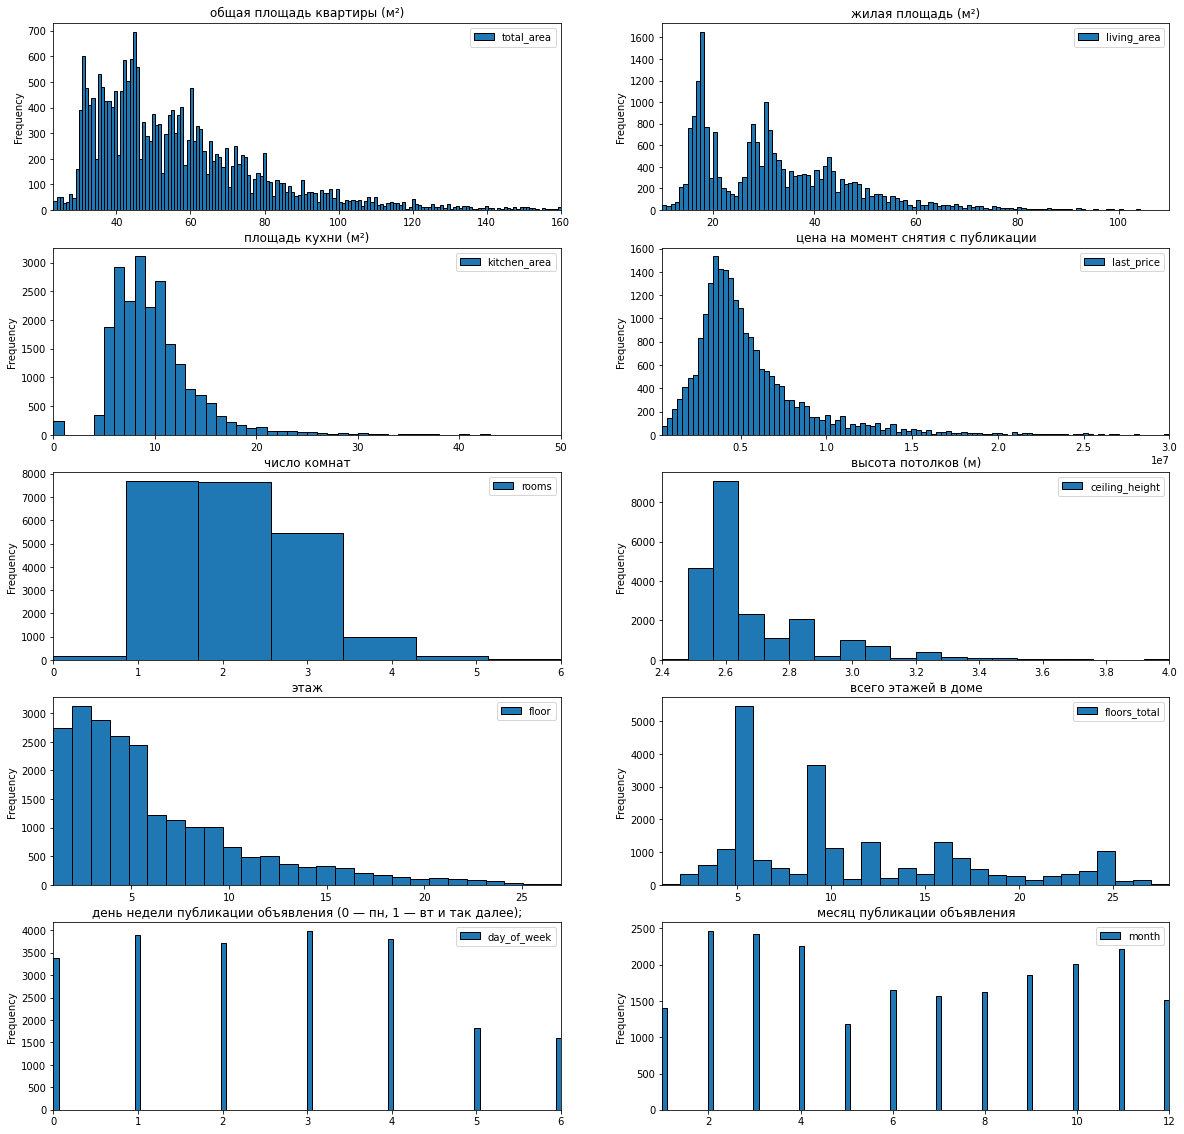

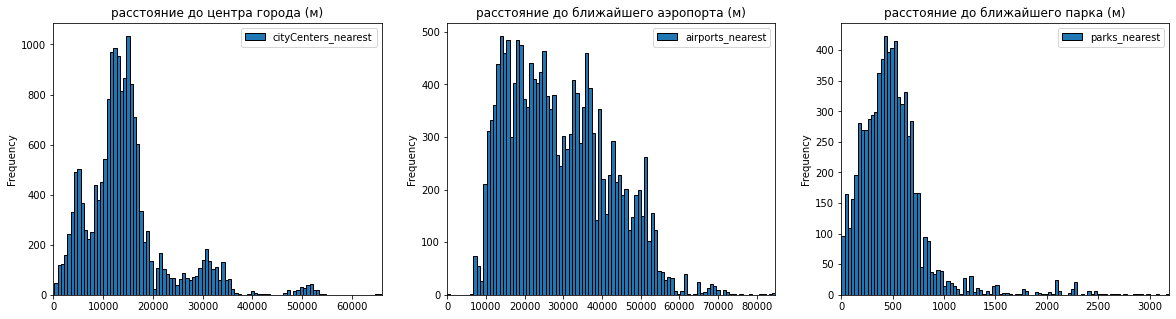

In [77]:
#построим гистрограммы
column_list = ['total_area', 'living_area', 'kitchen_area', 
               'last_price', 'rooms', 'ceiling_height', 
               'floor', 'floors_total', 'day_of_week', 'month']
title = ['общая площадь квартиры (м²)', 
         'жилая площадь (м²)',
         'площадь кухни (м²)', 
         'цена на момент снятия с публикации',
         'число комнат',
         'высота потолков (м)',
         'этаж', 
         'всего этажей в доме',
         'день недели публикации объявления (0 — пн, 1 — вт и так далее);',
         'месяц публикации объявления']

row = 5
col = 2
count = 0

fig, axes = plt.subplots(nrows=row, ncols=col, figsize=(20,20))

bins = [160, 120, 50, 100, 7, 20, 27, 28, 100, 100]
for r in range(row):
    for c in range(col):
        ax = data[column_list[count]].plot(kind='hist',
                                           bins=bins[count],
                                           ax=axes[r,c],
                                           legend=True, 
                                           ec='black',
                                           title=title[count])
        ax.set_xlim(data[column_list[count]].min(), data[column_list[count]].max())
        count += 1

column_list = ['cityCenters_nearest', 'airports_nearest', 'parks_nearest']
title = ['расстояние до центра города (м)', 
        'расстояние до ближайшего аэропорта (м)',
        'расстояние до ближайшего парка (м)']
row = 1
col = 3

fig, axes = plt.subplots(nrows=row, ncols=col, figsize=(20,5))
count = 0

for c in range(col):
    ax = data[data[column_list[count]] >= 0][column_list[count]].plot(kind='hist',
                                           bins=100,
                                           ax=axes[c],
                                           legend=True, 
                                           ec='black',
                                           title=title[count])
    ax.set_xlim(data[column_list[count]].min(), data[column_list[count]].max())
    count += 1


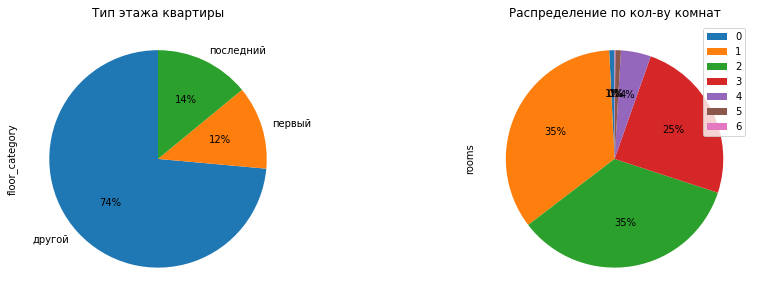

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
data.groupby(by='floor_category')['floor_category'].count().plot(y='floor_category', 
                                                                 kind='pie',
                                                                 autopct='%1.0f%%',
                                                                 startangle=90, 
                                                                 title='Тип этажа квартиры',
                                                                ax=axes[0])

data.groupby(by='rooms')['rooms'].count().plot(y='rooms',
                                               kind='pie',
                                               autopct='%1.0f%%',
                                               startangle=90, 
                                               ax=axes[1],
                                               legend=True,
                                               labels=None, 
                                               title='Распределение по кол-ву комнат');

**Вывод**
- Большая часть квартир имеет метраж от 30 до 80 кв.м., медиана 50 кв.м.
- Цена на квартиры лежит в промежутке от 1 до 12 млн. Большая часть квартир продается за цену в промежутке между 3 и 6 млн, медиана 4.5 млн 
- 2/3 квартир имеют 1 или 2 комнаты, чуть меньший процент имеют 3 комнаты и небольшое количество - 4. Есть и квартиры, имеющие больше комнат, но их процент сильно ниже, скорее всего это могут быть коммуналки, хостелы, общежитие.
- Квартиры имеют потолки от 2,5м до 3,2м, как правило, в центре города потолки выше.
- Больше всего квартир продаются с 1 по 5 этаж
- Больше всего 5-этажных и 9-этажных зданий
- Как правила объявления публикуют в будние дни
- Пик сезона в ноябре-феврале-марте, снижение активности летом и в новогодние праздики
- Наибольшее количество квартир продается в 10-17км от центра города - спальные района Санкт-Петрбурга
- До аэропорта от 10 до 50 км
- Для тех, у кого указан поблизости парк, он находиться менее чем в 1 км


#### Как быстро продавались квартиры

- `days_exposition` - параметр показывает, сколько дней «висело» каждое объявление
- Построим гистограмму
- Посчитайте среднее и медиану



Посмотрим на данные и гистограмму по времени продажи квартиры:

In [79]:
#посмотрим статистику по данным столбца days_exposition
data['days_exposition'].describe().to_frame()

,days_exposition
count,22176.000000
mean,148.035444
std,192.283487
min,-1.000000
25%,23.000000
50%,72.000000
75%,193.000000
max,1100.000000


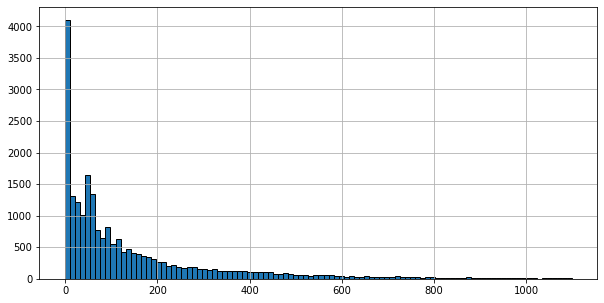

In [80]:
#построим гистограмму
data['days_exposition'].hist(bins=100, figsize=(10,5), ec='black');

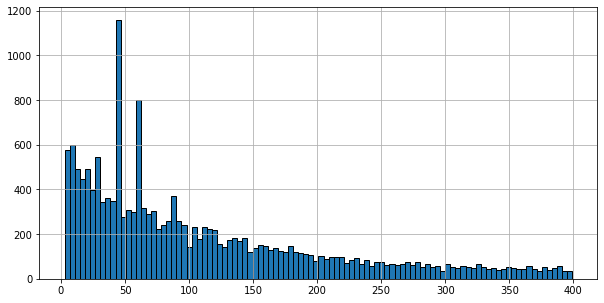

In [81]:
#посмотрим на данные более детально
data.query('days_exposition>0 and days_exposition<400')['days_exposition'].hist(bins=100, figsize=(10,5), ec='black');

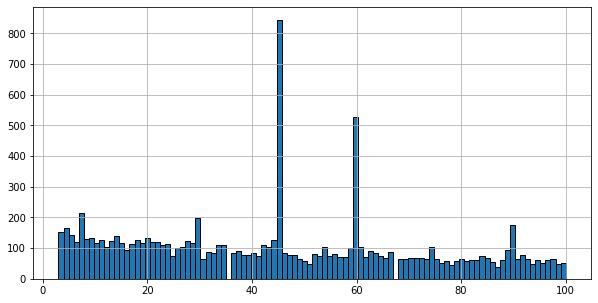

In [82]:
#на гистограмме видны аномально высокие продажи в районе до 100 дней
#ограничим время размещения 100 днями и ещё раз построим гистограмму:
data.query('days_exposition>0 and days_exposition<=100')['days_exposition'].hist(bins=100, figsize=(10,5), ec='black');

Нашла в Яндекс справке сроки размещения бесплатного объявления по продаже квартир:
- до 4,5 млн — 45 дней
- от 4,5 до 10 млн — 60 дней
- от 10 млн — 90 дней 

Именно из-за тарифа вызваны большие всплески, Яндекс Недвижимость автоматически снимает  объявления с публикации в эти дни. Уберем эти дни из среза, чтобы они не искажали нам картину с реально проданными квартирами

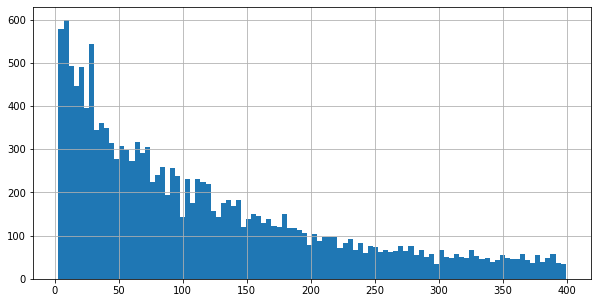

In [83]:
#Посмотрим на данные еще раз
(
    data.query('days_exposition>=0 and days_exposition<400 and days_exposition!=[45, 60, 90]')['days_exposition']
    .hist(bins=100, figsize=(10,5))
);

In [84]:
(
    data.query('days_exposition>=0 and days_exposition<400 and days_exposition!=[45, 60, 90]')
    .pivot_table(index='year', values='days_exposition', aggfunc=['mean', 'median', 'count'])
)

,mean,median,count
,days_exposition,days_exposition,days_exposition
year,,,
2015,292.992593,290,270
2016,175.003129,159,1598
2017,126.992978,98,6266
2018,96.660032,72,6330
2019,29.101911,21,942


**Вывод:**

Есть объявления, которые были опубликованы более 4 лет \
Минимальное количество - 1 день \
Судя по гистограмме - мы имеем распределение Пуассона. 
Среднее время продажи - около полугода, 174 дня. Медианное - 3 месяца, 92 дня. \
Большая часть квартир продавалась в течение первых 50 дней, есть и квартиры, которые продавались до года. Чем дальше, тем реже встречаются такие случаи.

Сделав гистограмму со значениями от 0 до 100 с кол-вом корзин 100, увидели у нас аномалии на 45, 60 днях. Загуглила правила размещения объявлений в Яндекс Недвижимость, оказалось что именно после этих дней объявление считается неактуальным и снимается автоматически. 
Убрали эти значения из выборки.

#### Факторы больше всего влияющие на общую (полную) стоимость объекта

Построим графики, которые покажут зависимость цены от указанных ниже параметров.
- общей площади;
- жилой площади;
- площади кухни;
- количество комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год);

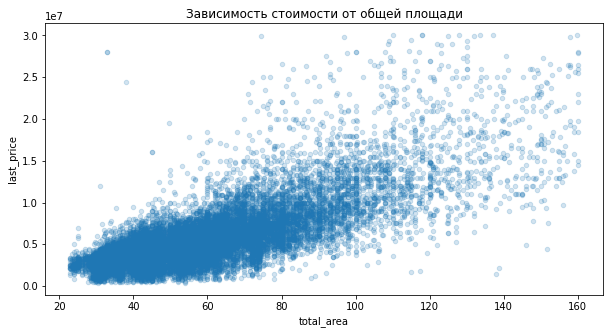

In [85]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.2, figsize=(10,5), 
          title='Зависимость стоимости от общей площади');

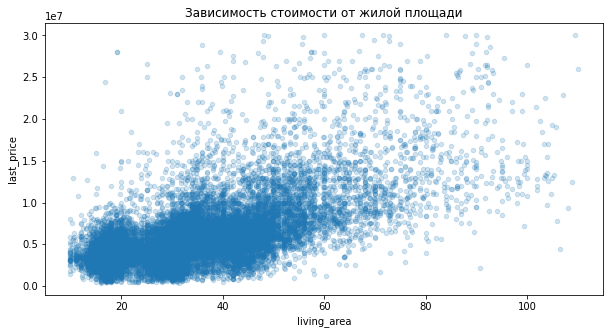

In [86]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.2, figsize=(10,5), 
          title='Зависимость стоимости от жилой площади');


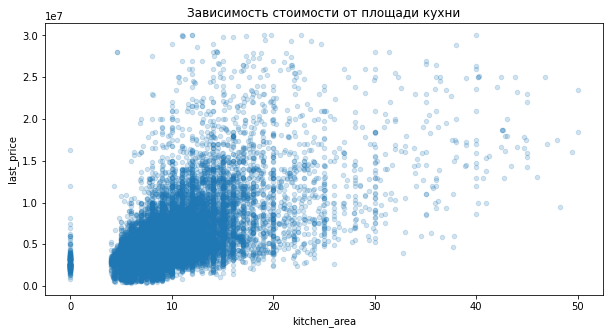

In [87]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.2, figsize=(10,5), 
          title='Зависимость стоимости от площади кухни');


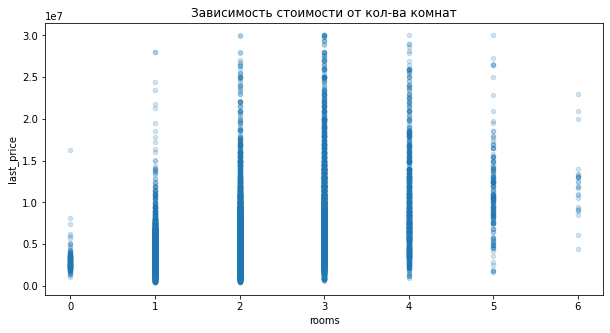

In [88]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.2, figsize=(10,5), 
          title='Зависимость стоимости от кол-ва комнат');

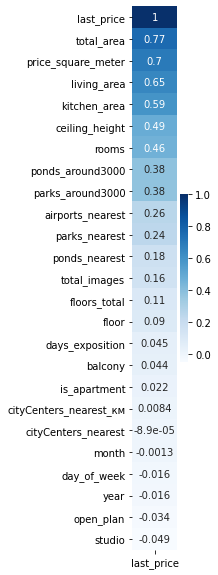

In [89]:
plt.figure(figsize=(1,10))
sns.heatmap(data.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Blues", annot=True);

,mean,median,count
floor_category,,,
другой,5.807474e+06,4750000,16314
первый,4.465164e+06,3900000,2747
последний,5.181985e+06,4200000,3115


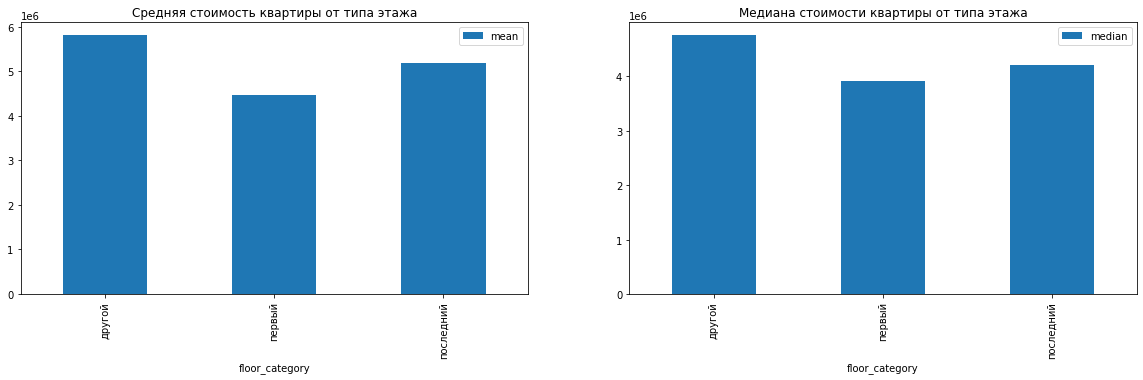

In [90]:
data_sort = data.pivot_table(index= 'floor_category', values='last_price', aggfunc=['mean', 'median', 'count'])
data_sort.columns = ['mean', 'median', 'count']

display(data_sort)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))


data_sort.sort_values('floor_category').plot(y='mean', 
                                             kind='bar',
                                             ax=axes[0],
                                             title = 'Средняя стоимость квартиры от типа этажа');
data_sort.sort_values('floor_category').plot(y='median', 
                                             kind='bar',
                                             ax=axes[1],
                                             title = 'Медиана стоимости квартиры от типа этажа');



,mean,median,count
day_of_week,,,
0,5.601935e+06,4600000,3387
1,5.570228e+06,4650000,3892
2,5.611432e+06,4600000,3709
3,5.621677e+06,4550000,3975
4,5.507761e+06,4500000,3794
5,5.398587e+06,4500000,1828
6,5.388879e+06,4500000,1591


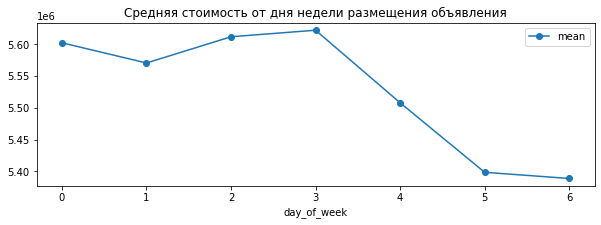

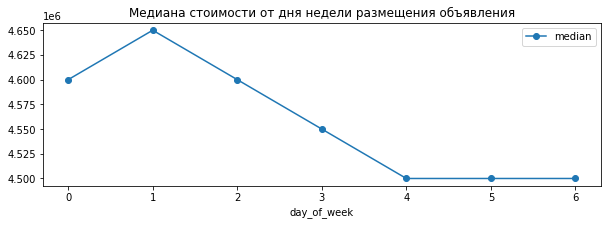

In [91]:
data_sort = data.pivot_table(index='day_of_week', values='last_price', aggfunc=['mean', 'median', 'count'])
data_sort.columns = ['mean', 'median', 'count']
display(data_sort)

data_sort.sort_values('day_of_week').plot(y='mean', style='o-',figsize=(10,3), 
                                                  title='Средняя стоимость от дня недели размещения объявления')

data_sort.sort_values('day_of_week').plot(y='median', style='o-',figsize=(10,3), 
                                                  title='Медиана стоимости от дня недели размещения объявления');


,mean,median,count
month,,,
1,5.642438e+06,4545000,1398
2,5.545505e+06,4600000,2461
3,5.523116e+06,4592000,2428
4,5.687033e+06,4750000,2254
5,5.443560e+06,4500000,1186
6,5.335575e+06,4350000,1657
7,5.561388e+06,4550000,1567
8,5.521627e+06,4500000,1627
9,5.686183e+06,4650000,1857


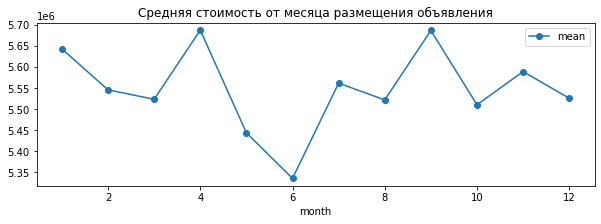

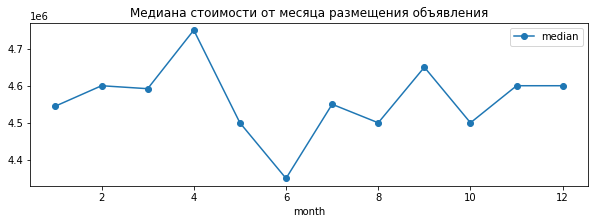

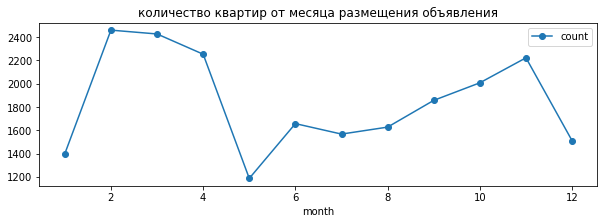

In [92]:
data_sort = data.pivot_table(index='month', values='last_price', aggfunc=['mean', 'median', 'count'])
data_sort.columns = ['mean', 'median', 'count']
display(data_sort)
data_sort.sort_values('month').plot(y='mean', style='o-',figsize=(10,3), 
                                                  title='Средняя стоимость от месяца размещения объявления')

data_sort.sort_values('month').plot(y='median', style='o-',figsize=(10,3), 
                                                  title='Медиана стоимости от месяца размещения объявления');
data_sort.sort_values('month').plot(y='count', style='o-',figsize=(10,3), 
                                                  title='количество квартир от месяца размещения объявления');

,mean,median,count
year,,,
2014,8.992753e+06,7182500,92
2015,6.202067e+06,5078500,978
2016,5.547792e+06,4465000,2592
2017,5.450960e+06,4450000,7735
2018,5.410699e+06,4500000,8062
2019,5.923357e+06,5000000,2717


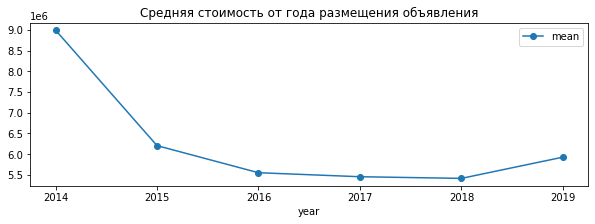

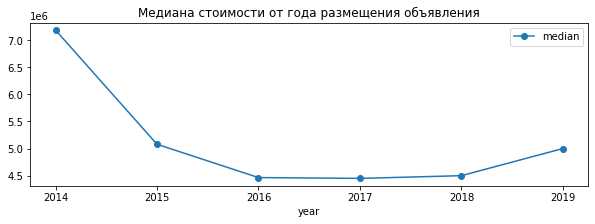

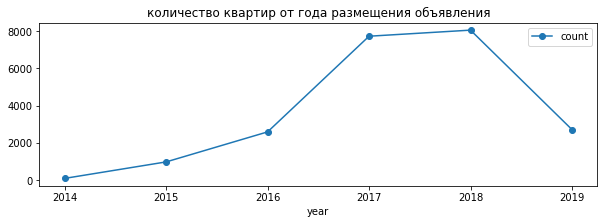

In [93]:
data_sort = data.pivot_table(index='year', values='last_price', aggfunc=['mean', 'median', 'count'])
data_sort.columns = ['mean', 'median', 'count']
display(data_sort)

data_sort.sort_values('year').plot(y='mean', style='o-',figsize=(10,3), 
                                                  title='Средняя стоимость от года размещения объявления')

data_sort.sort_values('year').plot(y='median', style='o-',figsize=(10,3), 
                                                  title='Медиана стоимости от года размещения объявления')

data_sort.sort_values('year').plot(y='count', style='o-',figsize=(10,3), 
                                                  title='количество квартир от года размещения объявления');

***Вывод:*** 
- чем больше площадь (общая, жилая, кухня) тем выше цена
- чем больше комнат, тем выше цена
- квартиры на первом этаже дешевле остальных, квартиры на последних этажах незначительно, но всё же дешевле, чем квартиры расположенные на других этажах 
- день недели и месц размещения объявления практически не влияют на стоимость квартиры, можно отметить, что в начале недели размещают более дорогие квартиры, сезон продаж весной и в конце года
- не стоит ориентироваться на 2014 и 2019 год, так как указаны не полные периоды
- снижение стоимости продолжалось с 2015 по 2017 год, с 2018 наметился рост
- активный рост популярности сервиса Яндекс Недвижимости с 2016г

#### Населённые пункты с самой высокой и низкой стоимостью квадратного метра

- Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
- Построим столбчатый график для населённых пунктов с самой высокой и низкой стоимостью квадратного метра. 

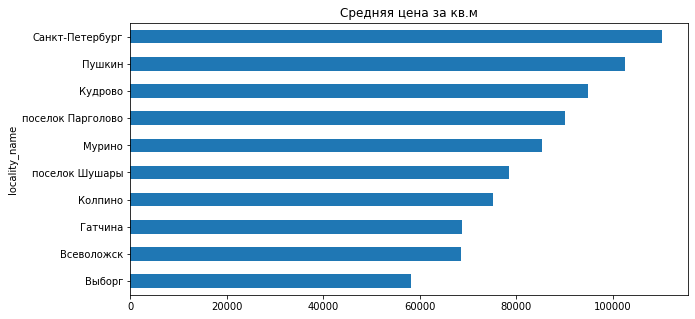

In [94]:
locality_name_price_square_meter = data.pivot_table(index= 'locality_name', 
                                                    values='price_square_meter', 
                                                    aggfunc=['mean', 'count'])
locality_name_price_square_meter.columns = ['mean_price_square_meter', 'count']
(
    locality_name_price_square_meter.sort_values(by='count', ascending=False)
    .head(10)['mean_price_square_meter']
    .astype('int')
    .sort_values()
    .plot(kind='barh',  title='Средняя цена за кв.м', figsize=(10, 5))
);

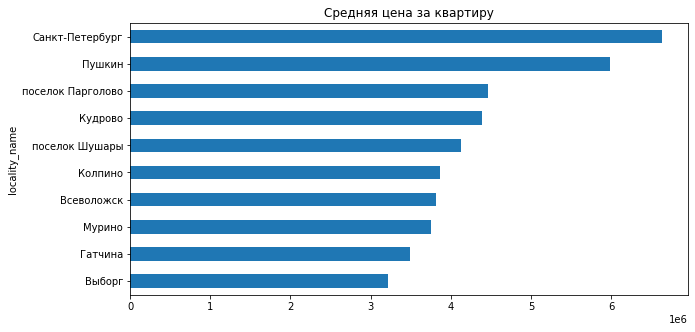

In [95]:
locality_name_price = data.pivot_table(index= 'locality_name', 
                                                    values='last_price', 
                                                    aggfunc=['mean', 'count'])
locality_name_price.columns = ['mean_price', 'count']
(
    locality_name_price.sort_values(by='count', ascending=False)
    .head(10)['mean_price']
    .astype('int')
    .sort_values()
    .plot(kind='barh', title='Средняя цена за квартиру', figsize=(10, 5))
);

***Вывод:*** 
- самые дорогие квартиры в Санкт-Петербурге и в Пушкине это видно и по цене за квартиру и по цене за квадратный метр
- самая низкая стоимость в Выборге
- чем дальше от Санкт-Петербурга, тем дешевле

#### Стоимость объектов в зависимости от расстояния до центра города.

Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра.

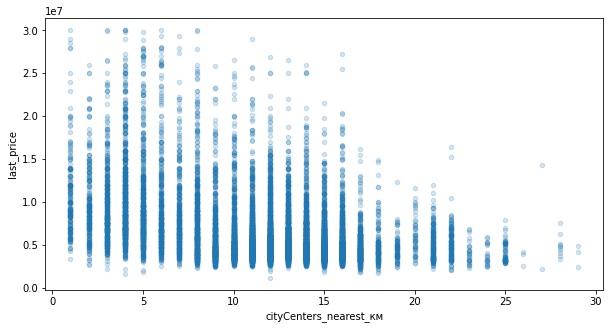

In [96]:
(
    data.query('cityCenters_nearest_км>0 and locality_name=="Санкт-Петербург"')
    .plot(x='cityCenters_nearest_км', y='last_price', kind='scatter', alpha=0.2, figsize=(10,5))
);

,median,count
cityCenters_nearest_км,,
1,9850000.0,185
2,8900000.0,237
3,8090000.0,447
4,9040000.0,756
5,8150000.0,621
6,7400000.0,402
7,7000000.0,356
8,6450000.0,630
9,4990000.0,658


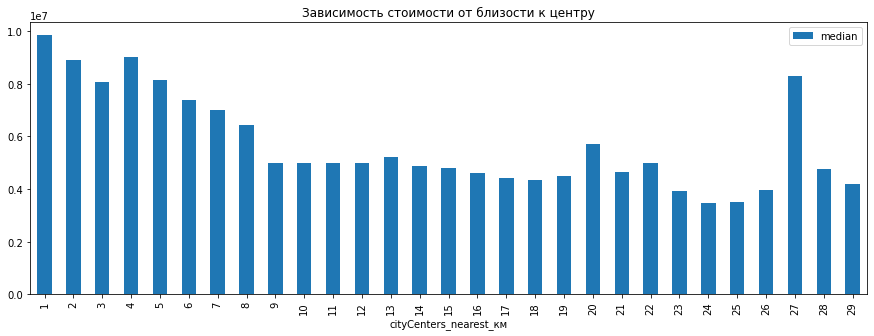

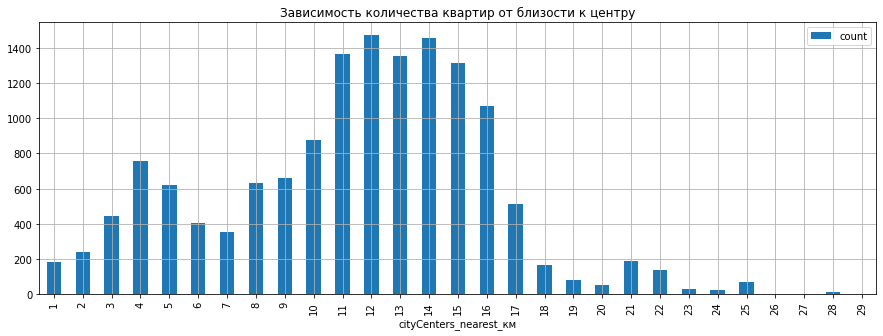

In [97]:
data_sort = (
    data.query('cityCenters_nearest_км>0 and locality_name=="Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_км', values='last_price', aggfunc=['median', 'count'])
)
data_sort.columns = ['median', 'count']
display(data_sort)

data_sort.sort_values('cityCenters_nearest_км').plot(y='median', 
                                                kind='bar',
                                                figsize=(15,5), 
                                                title = 'Зависимость стоимости от близости к центру');
data_sort.sort_values('cityCenters_nearest_км').plot(y='count', 
                                                kind='bar',
                                                figsize=(15,5), 
                                                title = 'Зависимость количества квартир от близости к центру',
                                                grid=True);

In [98]:
data.query('cityCenters_nearest_км==27 and locality_name=="Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,center_category,area_category,price_square_meter,day_of_week,month,year,floor_category,cityCenters_nearest_км
748,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,-1,128,4) спальные районы и пригород,07) 70-80 кв.м,193918,1,11,2017,другой,27
5961,6,2250000,32.0,2018-02-27,1,2.60,2,16.5,2,False,...,-1,178,4) спальные районы и пригород,03) 30-40 кв.м,70312,1,2,2018,последний,27


**Вывод:**
- cамые дорогие квартиры в самом центре города в пределах 5 километра от Дворцовой
- на графике четко видно снижение цены после 8-ого километра 
- спальный район города находится в пределах 8 до 17 км


### Общий вывод

**Обзор данных:** 
- источник Яндекс Недвижимость 
- в таблице 22 столбца и 23699 строк
- срез данных с 27.11.2014 по 03.05.2019

**Предобработка данных** 
- заполнили пропущенные значения в 14 столбцах
- привели к правильному типу данных 
- удалили неявные дубликаты в `locality_name`
- удалили редкие и выбивающиеся значения
- нашли положительную корреляцию у `living_area`, `kitchen_area` c `total_area`
- категоризировали строки по общей площади и по удаленности от центра города
- исправили аномалии в столбце `ceiling_height`
- всего удалено 1523 строки, это около 6.4% от всех данных
- добавили в таблицу новые вспомогательные столбцы для дальнейшего анализа    

**Исследовательский анализ данных**

- Изучив параметры с помощью гистограмм, выяснили, что средняя стоимость квартиры составляет 4,5 млн рублей. Средняя площадь квартир составляет 50 кв.м, жилая площадь — 30 кв.м, площадь кухни — 9 кв.м и высотой потолков в 2.6 метра. 
36%  квартир имеют — 1 комнату, 35% — 2 комнаты, 24% — 3 комнаты, 5% —
 4 и более комнат
- Больше всего 5-этажных и 9-этажных зданий
- Чаще объявления публикуют в будние дни
- Больше всего объявлений публикуют в феврале-марте-апреле и ноябре, снижение активности летом и в новогодние праздники
- Наибольшее количество квартир продается в 8-17 км от центра города - в спальных районах Санкт-Петербурга
- среднее время продажи — полугода,  медианное — 3 месяца
- большая часть квартир продавалась в течение первых 50 дней

**Факторы, влияющие на стоимость квартиры**

- чем больше площадь (общая, жилая, кухня), тем выше цена
- чем больше комнат, тем выше цена
- на первом этаже квартира дешевле, чем на остальных; на последнем дороже, чем на первом, но дешевле чем на остальных 
- день недели и месц размещения объявления практически не влияют на стоимость квартиры, можно отметить, что в начале недели размещают более дорогие квартиры, сезон продаж весной и в конце года
- снижение стоимости квартир продолжалось с 2015 по 2017 год, с 2018 наметился рост
- активный рост популярности сервиса Яндекс Недвижимости с 2016г
- из 10 населенных пунктов с наибольшим количеством объявлений, самые дорогие квартиры в Санкт-Петербурге и в Пушкине, самая низкая стоимость в Выборге
- чем дальше от Санкт-Петербурга, тем дешевле
- самые дорогие квартиры в самом центре города в пределах 5 км

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод